<a href="https://colab.research.google.com/github/sejalapeno/InceptionV3-Lung-Classification/blob/main/inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import keras.applications

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Lung Disease Dataset/train'
valid_path = '/content/drive/MyDrive/Lung Disease Dataset/test'

In [ ]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Lung Disease Dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Lung Disease Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6054 images belonging to 5 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Lung Disease Dataset/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
190/190 [==============================] - 2218s 12s/step - loss: 2.5382 - accuracy: 0.6858 - val_loss: 1.6879 - val_accuracy: 0.7600
Epoch 2/10
190/190 [==============================] - 1171s 6s/step - loss: 1.8526 - accuracy: 0.7588 - val_loss: 2.4197 - val_accuracy: 0.7032
Epoch 3/10
190/190 [==============================] - 1128s 6s/step - loss: 1.9210 - accuracy: 0.7805 - val_loss: 2.0737 - val_accuracy: 0.7654
Epoch 4/10
190/190 [==============================] - 1173s 6s/step - loss: 1.9182 - accuracy: 0.7851 - val_loss: 2.0324 - val_accuracy: 0.7822
Epoch 5/10
190/190 [==============================] - 1136s 6s/step - loss: 1.9116 - accuracy: 0.7937 - val_loss: 2.2810 - val_accuracy: 0.7832
Epoch 6/10
190/190 [==============================] - 1124s 6s/step - loss: 1.6131 - accuracy: 0.8180 - val_loss: 2.1081 - val_accuracy: 0.7694
Epoch 7/10
190/190 [==============================] - 1166s 6s/step - loss: 2.6227 - accuracy: 0.7854 - val_loss: 2.3918 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

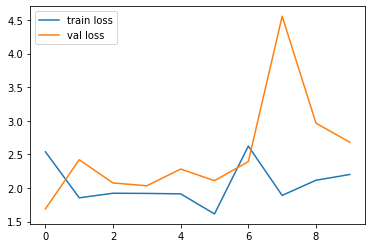

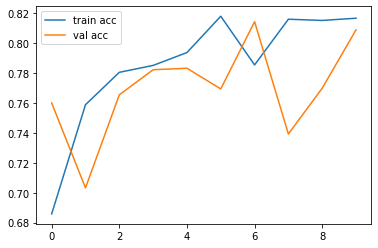

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/data/model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

64/64 [==============================] - 289s 4s/step


In [ ]:
y_pred

array([[3.7610733e-20, 9.9999994e-01, 5.3541744e-09, 1.6896609e-16,
        2.6320089e-21],
       [5.0099679e-18, 7.0524232e-33, 9.9999994e-01, 2.3821325e-30,
        2.1365998e-16],
       [9.2038874e-08, 9.9999684e-01, 9.5418208e-08, 2.9020291e-06,
        2.7247236e-20],
       ...,
       [9.9994296e-01, 8.0832550e-22, 3.8348960e-09, 2.9444945e-30,
        5.7021993e-05],
       [1.8511410e-31, 1.8852785e-29, 2.5548110e-27, 9.9999994e-01,
        3.8189009e-36],
       [3.3359388e-22, 1.0000000e+00, 5.4980865e-28, 9.3228861e-21,
        4.4624311e-29]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 1, ..., 0, 3, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('/content/drive/MyDrive/Lung Disease Dataset/test/Bacterial Pneumonia/17.jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[28., 28., 28.],
        [31., 31., 31.],
        [41., 41., 41.],
        ...,
        [21., 21., 21.],
        [19., 19., 19.],
        [18., 18., 18.]],

       [[27., 27., 27.],
        [36., 36., 36.],
        [40., 40., 40.],
        ...,
        [24., 24., 24.],
        [21., 21., 21.],
        [20., 20., 20.]],

       [[26., 26., 26.],
        [38., 38., 38.],
        [41., 41., 41.],
        ...,
        [26., 26., 26.],
        [23., 23., 23.],
        [22., 22., 22.]],

       ...,

       [[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.]],

       [[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.]],

       [[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [ 9.,  9.,  9.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[2.020601e-09, 9.279583e-09, 8.970130e-09, 9.999999e-01,
        6.534163e-08]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test_it.classes, preds, labels = [0,1,2,3,4]),
                  index=["Actual Bacterial Pneumonia","Actual Corona Virus","Actual Normal","Actual Tuberculosis", "Actual Viral Pneumonia"],
                  columns=["Predicted Bacterial Pneumonia","Predicted Corona Virus","Predicted Normal","Predicted Tuberculosis", "Predicted Viral Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

SyntaxError: ignored